<a href="https://colab.research.google.com/github/MRahul2002987/Casestudy/blob/main/OTTOcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [3]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 67 Jan  7 14:42 kaggle.json
/content


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c otto-recommender-system

In [ ]:
#!unzip "/content/otto-recommender-system.zip" -d "/content/data/"

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from pathlib import Path
data_path = Path('/content/data/')

sample_size = 100_000

chunks = pd.read_json(data_path / 'train.jsonl' , lines=True, chunksize = sample_size)

for chunk in chunks :
    train_df = chunk
    break

train_df.set_index('session', drop=True, inplace=True)
train_df

,events
session,
0,"[{'aid': 1517085, 'ts': 1659304800025, 'type':..."
1,"[{'aid': 424964, 'ts': 1659304800025, 'type': ..."
2,"[{'aid': 763743, 'ts': 1659304800038, 'type': ..."
3,"[{'aid': 1425967, 'ts': 1659304800095, 'type':..."
4,"[{'aid': 613619, 'ts': 1659304800119, 'type': ..."
...,...
99995,"[{'aid': 1387489, 'ts': 1659326711310, 'type':..."
99996,"[{'aid': 1091948, 'ts': 1659326711396, 'type':..."
99997,"[{'aid': 366639, 'ts': 1659326711431, 'type': ..."


In [6]:
train_df.iloc[1,0]

[{'aid': 424964, 'ts': 1659304800025, 'type': 'carts'},
 {'aid': 1492293, 'ts': 1659304852871, 'type': 'clicks'},
 {'aid': 1492293, 'ts': 1659304863627, 'type': 'carts'},
 {'aid': 910862, 'ts': 1659304891923, 'type': 'clicks'},
 {'aid': 910862, 'ts': 1659304900209, 'type': 'carts'},
 {'aid': 1491172, 'ts': 1659385939248, 'type': 'clicks'},
 {'aid': 1491172, 'ts': 1659385945915, 'type': 'carts'},
 {'aid': 424964, 'ts': 1659385993848, 'type': 'clicks'},
 {'aid': 1515526, 'ts': 1659386025990, 'type': 'clicks'},
 {'aid': 440486, 'ts': 1659473014870, 'type': 'clicks'},
 {'aid': 109488, 'ts': 1659473065576, 'type': 'clicks'},
 {'aid': 1507622, 'ts': 1659473076244, 'type': 'clicks'},
 {'aid': 1734061, 'ts': 1659855882096, 'type': 'clicks'},
 {'aid': 854637, 'ts': 1659990929876, 'type': 'clicks'},
 {'aid': 854637, 'ts': 1659990941327, 'type': 'carts'},
 {'aid': 718983, 'ts': 1659990943793, 'type': 'clicks'},
 {'aid': 215311, 'ts': 1659990959575, 'type': 'clicks'},
 {'aid': 215311, 'ts': 165999

In [7]:
import gc
del train_df
gc.collect()

0

In [9]:
train_df = pd.DataFrame()
chunks = pd.read_json(data_path / 'train.jsonl', lines=True, chunksize=100_000)

for chunk in chunks:
    event_dict = {'session': [], 'aid': [], 'ts': [], 'type': []}
    
    for session, events in zip(chunk['session'].tolist(), chunk['events'].tolist()):
        for event in events:
            event_dict['session'].append(session)
            event_dict['aid'].append(event['aid'])
            event_dict['ts'].append(event['ts'])
            event_dict['type'].append(event['type'])
    train_df = pd.DataFrame(event_dict)
    
    break
        
train_df = train_df.reset_index(drop=True)
train_df

,session,aid,ts,type
0,0,1517085,1659304800025,clicks
1,0,1563459,1659304904511,clicks
2,0,1309446,1659367439426,clicks
3,0,16246,1659367719997,clicks
4,0,1781822,1659367871344,clicks
...,...,...,...,...
5227648,99999,1544954,1660373630318,clicks
5227649,99999,1032408,1660373656430,clicks
5227650,99999,1544954,1660373678083,clicks
5227651,99999,554230,1660373715477,clicks


In [ ]:
#print(train_df.sample(n=10000).reset_index(drop=True))

In [10]:
train_df.iloc[4,0]

0

In [11]:
n_sessions = train_df["session"].nunique()
n_events = train_df.shape[0]

print(f"Number of sessions: {n_sessions}")
print(f"Number of events: {n_events}")

Number of sessions: 100000
Number of events: 5227653


In [17]:
#n = len(pd.unique(train_df['aid']))
n2 = train_df.nunique(axis=0)
  
print("No.of.unique values in each column :\n",n2)
train_df['type'].value_counts()

No.of.unique values in each column :
 session     100000
aid         663079
ts         5165764
type             3
dtype: int64


clicks    4770172
carts      364579
orders      92902
Name: type, dtype: int64

In [28]:
clicksnu= (train_df['type'].value_counts()['clicks']/(train_df['type'].value_counts()['clicks']+train_df['type'].value_counts()['carts']+train_df['type'].value_counts()['orders']))
cartsnu= train_df['type'].value_counts()['carts']/(train_df['type'].value_counts()['clicks']+train_df['type'].value_counts()['carts']+train_df['type'].value_counts()['orders'])
ordernu= train_df['type'].value_counts()['orders']/(train_df['type'].value_counts()['clicks']+train_df['type'].value_counts()['carts']+train_df['type'].value_counts()['orders'])
print(clicksnu)
print(cartsnu)
print(ordernu)


0.9124882619408748
0.06974047435818713
0.01777126370093807


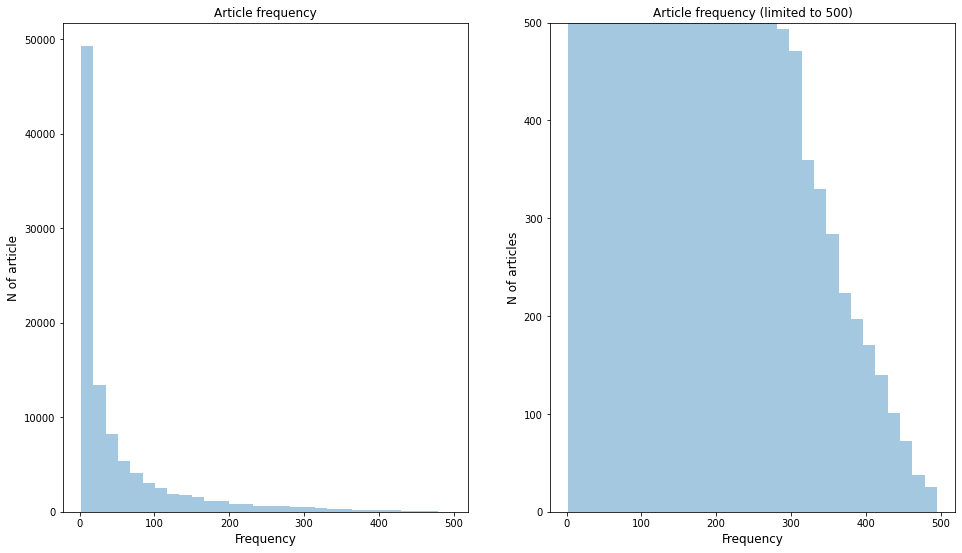

In [29]:
events_in_session = train_df.groupby(['session'])['aid'].count().sort_values(ascending=False)

fig, ax = plt.subplots(ncols=2, figsize=(16, 9))
sns.distplot(x=events_in_session.values, ax=ax[0], bins=30, kde=False)
ax[0].set_title('Article frequency', fontsize=12)
ax[0].set_ylabel('N of article', fontsize=12)
ax[0].set_xlabel('Frequency', fontsize=12)

sns.distplot(x=events_in_session.values, ax=ax[1], bins=30, kde=False)
ax[1].set_title('Article frequency (limited to 500)', fontsize=12)
ax[1].set_ylabel('N of articles', fontsize=12)
ax[1].set_xlabel('Frequency', fontsize=12)
ax[1].set_ylim(0, 500)

plt.show()

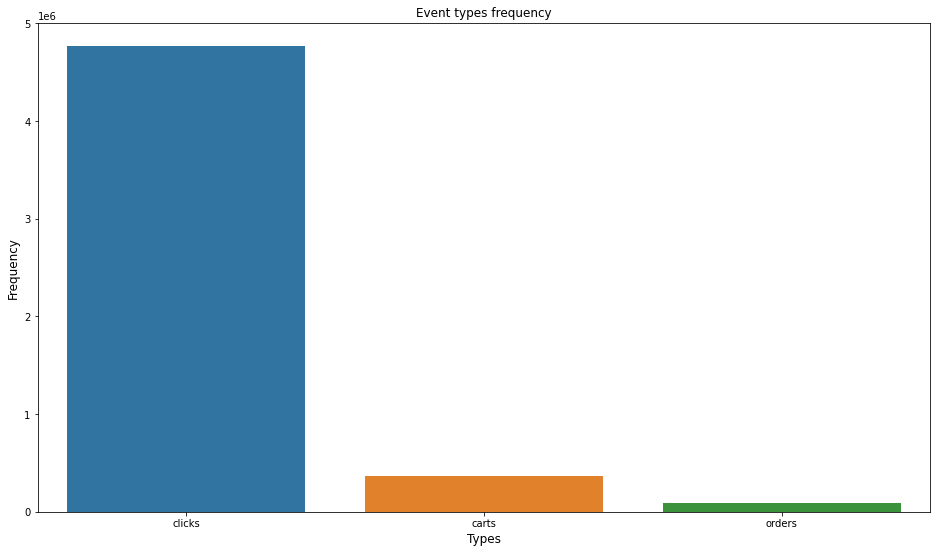

In [31]:
events_types = train_df.groupby(['type'])['type'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=events_types.index, y=events_types.values, ax=ax)
ax.set_title('Event types frequency', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Types', fontsize=12)
plt.show()

In [ ]:
https://www.kaggle.com/code/mohdmuttalib/otto-eda

In [51]:
train_df

,session,aid,ts,type,minutes
0,0,1517085,1659304800025,clicks,1.741433
1,0,1563459,1659304904511,clicks,1042.248583
2,0,1309446,1659367439426,clicks,4.676183
3,0,16246,1659367719997,clicks,2.522450
4,0,1781822,1659367871344,clicks,0.240867
...,...,...,...,...,...
5227648,99999,1544954,1660373630318,clicks,0.435200
5227649,99999,1032408,1660373656430,clicks,0.360883
5227650,99999,1544954,1660373678083,clicks,0.623233
5227651,99999,554230,1660373715477,clicks,0.172533


In [52]:
temp = train_df.groupby(['type','aid'])['session'].agg('count').reset_index()
temp.columns = ['type','aid','count']
order_num_df = temp.loc[(temp['type'] == 'orders'), ]
order_num_df = order_num_df.sort_values(['count'],ascending=False).reset_index()
order_num_df

,index,type,aid,count
0,812656,orders,80222,127
1,840266,orders,1022566,106
2,815207,orders,166037,94
3,858211,orders,1629608,76
4,861353,orders,1733943,75
...,...,...,...,...
54751,831592,orders,727990,1
54752,831593,orders,728010,1
54753,831594,orders,728086,1
54754,831595,orders,728208,1


In [50]:
import random
indices = [i for i in range(100)]
random.shuffle(indices)
indices = indices[:3]
print(f"Chunks chosen: {indices}")

chunks_of_train = []
for idx, chunk in enumerate(train_df):
    if idx in indices:
        chunks_of_train.append(chunk)
    if idx > max(indices):
        break

chunks_of_train = pd.concat(chunks_of_train)
chunks_of_train

Chunks chosen: [52, 85, 77]


ValueError: ignored

In [44]:
train_df["minutes"] = train_df[["session", "ts"]].groupby("session").diff(-1)*(-1/1000/60)
train_df

,session,aid,ts,type,minutes
0,0,1517085,1659304800025,clicks,1.741433
1,0,1563459,1659304904511,clicks,1042.248583
2,0,1309446,1659367439426,clicks,4.676183
3,0,16246,1659367719997,clicks,2.522450
4,0,1781822,1659367871344,clicks,0.240867
...,...,...,...,...,...
5227648,99999,1544954,1660373630318,clicks,0.435200
5227649,99999,1032408,1660373656430,clicks,0.360883
5227650,99999,1544954,1660373678083,clicks,0.623233
5227651,99999,554230,1660373715477,clicks,0.172533


In [ ]:
temp = train_df.groupby(['type','aid'])['session'].agg('count').reset_index()
temp.columns = ['type','aid','count']
order_num_df = temp.loc[(temp['type'] == 'orders'), ]
order_num_df = order_num_df.sort_values(['count'],ascending=False).reset_index()
order_num_df

In [ ]:
order_num_df.aid = ' ' + order_num_df.aid.astype('str')
best_sold_list = order_num_df[:20].aid.sum()
best_sold_list

In [ ]:
test_df = pd.DataFrame()
chunks = pd.read_json(data_path / 'test.jsonl', lines=True, chunksize=100_000)

for chunk in chunks:
    event_dict = {'session': [],'aid': [],'ts': [],'type': []}
    for session, events in zip(chunk['session'].tolist(), chunk['events'].tolist()):
        for event in events:
            event_dict['session'].append(session)
            event_dict['aid'].append(event['aid'])
            event_dict['ts'].append(event['ts'])
            event_dict['type'].append(event['type'])
    chunk_session = pd.DataFrame(event_dict)
    test_df = pd.concat([test_df, chunk_session])
            
test_df = test_df.reset_index(drop=True)
test_df

In [ ]:
%%time
test_df["minutes"] = test_df[["session", "ts"]].groupby("session").diff(-1)*(-1/1000/60)
test_df = test_df.sort_values(['minutes'],ascending=False)

test_action_df = test_df.copy()
test_action_df.aid = ' ' + test_df.aid.astype('str')
test_action_df = test_action_df.groupby(['session','type'])['aid'].sum().reset_index()
test_action_df

In [ ]:
next_orders_df = pd.DataFrame(test_action_df.loc[(test_action_df["type"] == 'carts'), ])
next_orders_df['type'] = 'orders'
next_orders_df

In [ ]:
next_carts_df = pd.DataFrame(test_action_df.loc[(test_action_df["type"] == 'clicks'), ])
next_carts_df['type'] = 'carts'
next_carts_df

In [ ]:
next_clicks_df = pd.DataFrame(test_action_df.loc[(test_action_df["type"] == 'clicks'), ]).copy()